#FIX ANJIR INI FIX#

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement

# Data
data = {
    'club': ['Giga FC', 'Bintang Timur', 'Sadakata', 'Cosmo JNE', 'Radit FC', 'Black Steel', 
             'Pelindo Mutiara', 'Unggul FC', 'Fafage Vamos', 'Halus FC', 'Kancil WHW', 'Pendekar United'],
    'pertandingan': [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
    'menang': [3, 6, 4, 5, 4, 4, 5, 4, 5, 3, 1, 4],
    'kalah': [4, 1, 3, 2, 3, 2, 2, 5, 4, 2, 7, 2],
    'seri': [3, 3, 3, 3, 3, 4, 3, 1, 1, 5, 2, 4],
    'selisih_goal': [-2, -1, -1, 16, -4, 5, -3, -7, 4, 6, -1, 7],
    'skor': [12, 21, 15, 18, 15, 16, 18, 14, 16, 14, 5, 16]
}

df = pd.DataFrame(data)

In [39]:
# Data independen dan dependen
X = df[['pertandingan', 'menang', 'kalah', 'seri', 'selisih_goal']].values  # data independen
y = df['skor'].values  # data dependen

# Fungsi untuk membagi data
def train_test_split_custom(X, y, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)
    n_samples = X.shape[0]
    n_test = int(test_size * n_samples)
    indices = np.random.permutation(n_samples)
    train_indices, test_indices = indices[n_test:], indices[:n_test]
    
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    return X_train, X_test, y_train, y_test

# Split data
X_train, X_test, y_train, y_test = train_test_split_custom(X, y, test_size=0.2, random_state=42)

Mean Squared Error: 5.316911983139664e+36
R2 Score: -2.6256355472294633e+35
Mean Absolute Error: 2.305843009213694e+18
Root Mean Squared Error: 2.305843009213694e+18


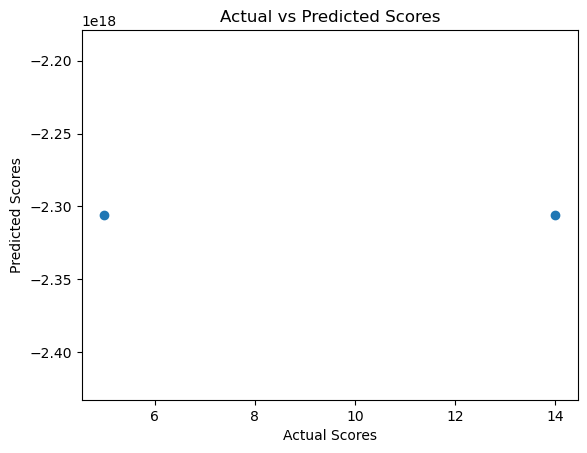

               club  pertandingan menang kalah seri  selisih_goal  \
0           Giga FC            22      7     7    8             1   
1     Bintang Timur            22      2    20    0            12   
2          Sadakata            22      1    11   10             9   
3         Cosmo JNE            22      5     1   16            14   
4          Radit FC            22     20     0    2            -8   
5       Black Steel            22     11     9    2            -6   
6   Pelindo Mutiara            22     21     0    1             8   
7         Unggul FC            22     11     8    3            -4   
8      Fafage Vamos            22     16     2    4            10   
9          Halus FC            22      9    11    2            -2   
10       Kancil WHW            22     15     6    1            -4   
11  Pendekar United            22     14     2    6             7   

   skor_prediksi  
0             29  
1              6  
2             13  
3             31  
4      

In [40]:
# Fungsi untuk mengubah fitur menjadi fitur polinomial
def polynomial_features(X, degree):
    n_samples, n_features = X.shape
    combinations = [combinations_with_replacement(range(n_features), i) for i in range(degree + 1)]
    flat_combinations = [item for sublist in combinations for item in sublist]
    n_output_features = len(flat_combinations)

    X_poly = np.empty((n_samples, n_output_features))

    for i, index_comb in enumerate(flat_combinations):
        X_poly[:, i] = np.prod(X[:, index_comb], axis=1)
    
    return X_poly

# Kelas Regresi Polinomial Ganda
class PolynomialRegression:
    def __init__(self, degree):
        self.degree = degree
        self.coefficients = None
        
    def fit(self, X, y):
        X_poly = polynomial_features(X, self.degree)
        X_poly_bias = np.c_[np.ones((X_poly.shape[0], 1)), X_poly]  # tambahkan bias term
        self.coefficients = np.linalg.inv(X_poly_bias.T.dot(X_poly_bias)).dot(X_poly_bias.T).dot(y)
        
    def predict(self, X):
        X_poly = polynomial_features(X, self.degree)
        X_poly_bias = np.c_[np.ones((X_poly.shape[0], 1)), X_poly]  # tambahkan bias term
        return X_poly_bias.dot(self.coefficients)

# Fit model
degree = 3  # Derajat polinomial yang ditingkatkan
model = PolynomialRegression(degree)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Metrik Evaluasi
def mean_squared_error (y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def r2_score (y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

def mean_absolute_error (y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

mse = mean_squared_error (y_test, y_pred)
r2 = r2_score (y_test, y_pred)
mae = mean_absolute_error (y_test, y_pred)
rmse = np.sqrt(mse)

# Output hasil evaluasi
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

# Plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Scores')
plt.show()

# Prediksi untuk data baru
data_prediksi = {
    'pertandingan': [22] * 12,
    'menang': [None] * 12,
    'kalah': [None] * 12,
    'seri': [None] * 12,
    'selisih_goal': [None] * 12
}
df_prediksi = pd.DataFrame(data_prediksi)

for i in range(len(df_prediksi)):
    menang = np.random.randint(0, 23)
    kalah = np.random.randint(0, 23 - menang)
    seri = 22 - menang - kalah
    df_prediksi.at[i, 'menang'] = menang
    df_prediksi.at[i, 'kalah'] = kalah
    df_prediksi.at[i, 'seri'] = seri

df_prediksi['selisih_goal'] = np.random.randint(-10, 20, size=(12,))
df_prediksi['skor_prediksi'] = df_prediksi['menang'] * 3 + df_prediksi['seri']
df_prediksi.insert(0, 'club', df['club'])
df_prediksi_sorted = df_prediksi.sort_values(by='skor_prediksi', ascending=False)

print(df_prediksi)


In [41]:
print(df_prediksi_sorted)

               club  pertandingan menang kalah seri  selisih_goal  \
6   Pelindo Mutiara            22     21     0    1             8   
4          Radit FC            22     20     0    2            -8   
8      Fafage Vamos            22     16     2    4            10   
11  Pendekar United            22     14     2    6             7   
10       Kancil WHW            22     15     6    1            -4   
7         Unggul FC            22     11     8    3            -4   
5       Black Steel            22     11     9    2            -6   
3         Cosmo JNE            22      5     1   16            14   
0           Giga FC            22      7     7    8             1   
9          Halus FC            22      9    11    2            -2   
2          Sadakata            22      1    11   10             9   
1     Bintang Timur            22      2    20    0            12   

   skor_prediksi  
6             64  
4             62  
8             52  
11            48  
10     

In [5]:
print("Rumus Regresi Polinomial Ganda Derajat 3:")
print(" y = β0 + β1*x1 + β2*x2 + β3*x3 + β4*x4 + β5*x1^2 + β6*x1*x2 + β7*x1*x3 + β8*x1*x4 + β9*x2^2 + β10*x2*x3 + β11*x2*x4 + β12*x3^2 + β13*x3*x4 + β14*x4^2 + β15*x1^3 + β16*x1^2*x2 \n"
      " β17*x1^2*x3 + β18*x1^2*x4 + β19*x1*x2^2 + β20*x1*x2*x3 + β21*x1*x2*x4 + β22*x1*x3^2 + β23*x1*x3*x4 + β24*x1*x4^2 + β25*x2^3 + β26*x2^2*x3 + β27*x2^2*x4 \n" 
      " β28*x2*x3^2 + β29*x2*x3*x4 + β30*x2*x4^2 + β31*x3^3 + β32*x3^2*x4 + β33*x3*x4^2 + β34*x4^3")


Rumus Regresi Polinomial Ganda Derajat 3:
 y = β0 + β1*x1 + β2*x2 + β3*x3 + β4*x4 + β5*x1^2 + β6*x1*x2 + β7*x1*x3 + β8*x1*x4 + β9*x2^2 + β10*x2*x3 + β11*x2*x4 + β12*x3^2 + β13*x3*x4 + β14*x4^2 + β15*x1^3 + β16*x1^2*x2 
 β17*x1^2*x3 + β18*x1^2*x4 + β19*x1*x2^2 + β20*x1*x2*x3 + β21*x1*x2*x4 + β22*x1*x3^2 + β23*x1*x3*x4 + β24*x1*x4^2 + β25*x2^3 + β26*x2^2*x3 + β27*x2^2*x4 
 β28*x2*x3^2 + β29*x2*x3*x4 + β30*x2*x4^2 + β31*x3^3 + β32*x3^2*x4 + β33*x3*x4^2 + β34*x4^3
